In [28]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Normalización de datos
data_entrenamiento = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)
data_validacion = ImageDataGenerator(rescale=1./255)

# Directorios relativos
carpeta_entrenamiento = os.path.join('..','..','data', 'entrenamiento')
carpeta_validacion = os.path.join('..','..','data', 'validacion')

# Clasificación de las imágenes en 4 categorías
data_entrenamiento = data_entrenamiento.flow_from_directory(
    carpeta_entrenamiento,
    target_size=(48,48), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación categórica para 4 clases
)

data_validacion = data_validacion.flow_from_directory(
    carpeta_validacion,
    target_size=(48,48), # Tamaño de las imágenes
    batch_size=64, # Tamaño del lote de procesamiento
    class_mode='categorical' # Clasificación categórica para 4 clases
)

Found 36000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.


In [11]:
# Identificación de las clases
print(data_entrenamiento.class_indices)

{'metal': 0, 'papel_y_carton': 1, 'plastico': 2, 'vidrio': 3}


## Entrenamiento de Modelo 4

### Arquitectura de 7 capas
- Capa 1: Capa de entrada
- Capa 2: Capa de convolución de 32 filtros
- Capa 3: Capa de convolución de 64 filtros
- Capa 4:  Capa de convolución de 128 filtros
- Capa 5: Capa de regularización 1
- Capa 6: Capa densa 1
- Capa 7: Capa de salida

In [12]:
# Definición del modelo de red neuronal convolucional CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(48, 48, 3)), # Capa de entrada con imágenes de 128x128 píxeles y 3 canales de color
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'), # Capa de convolución con 32 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # Capa de convolución con 64 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'), # Capa de convolución con 128 filtros de 3x3
    tf.keras.layers.BatchNormalization(), # Capa de normalización de la red neuronal
    tf.keras.layers.MaxPooling2D((2, 2)), # Reducción de las características detectadas (reducción de la dimensionalidad)
    
    tf.keras.layers.Flatten(), # Aplanamiento de las características detectadas en un vector unidimensional
    #tf.keras.layers.Dropout(0.5), # Capa de regularización de la red neuronal
    tf.keras.layers.Dense(512, activation='relu'), # Capa densa con 512 neuronas
    tf.keras.layers.Dense(4, activation='softmax') # Capa densa con 4 neuronas (4 clases) y función de activación softmax para clasificación
])

In [15]:
# Compilación del modelo CNN
model.compile(
    optimizer='adam', # Algoritmo de optimización Adam: adaptativo y eficiente
    loss='categorical_crossentropy', # Función de pérdida para clasificación multiclase (entropía cruzada)
    metrics=['accuracy']) # Métrica de evaluación de la precisión

In [16]:
# Cálculo de pasos
pasos_entrenamiento = data_entrenamiento.samples // data_entrenamiento.batch_size
pasos_validacion = data_validacion.samples // data_validacion.batch_size

print("Pasos de entrenamiento: ",pasos_entrenamiento)
print("Pasos de validación: ", pasos_validacion)

Pasos de entrenamiento:  562
Pasos de validación:  62


In [18]:
# Callbacks para mejorar el entrenamiento
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=3, 
        min_lr=0.00001
    )
]

In [19]:
# Entrenamiento del modelo
history = model.fit(
    data_entrenamiento, # Generador de datos de entrenamiento
    steps_per_epoch=pasos_entrenamiento, # Número de pasos por época
    epochs=20, # Número de épocas
    validation_data=data_validacion, # Generador de datos de validación
    validation_steps=pasos_validacion, # Número de pasos de validación
    callbacks=callbacks
) # Número de pasos de validación

Epoch 1/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 30s 52ms/step - accuracy: 0.5856 - loss: 1.2366 - val_accuracy: 0.6210 - val_loss: 0.9096 - learning_rate: 0.0010
Epoch 2/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 52us/step - accuracy: 0.7656 - loss: 0.6511 - val_accuracy: 0.6250 - val_loss: 1.0023 - learning_rate: 0.0010
Epoch 3/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.7969 - loss: 0.5381 - val_accuracy: 0.6255 - val_loss: 1.0624 - learning_rate: 0.0010
Epoch 4/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 30us/step - accuracy: 0.7500 - loss: 0.6342 - val_accuracy: 0.5625 - val_loss: 1.0330 - learning_rate: 0.0010
Epoch 5/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.9020 - loss: 0.2835 - val_accuracy: 0.7503 - val_loss: 0.6706 - learning_rate: 2.0000e-04
Epoch 6/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.8906 - loss: 0.3170 - val_accuracy: 0.6875 - val_loss: 0.6556 - learning_rate: 2.0000e-04
Epoch 7/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.949

Mejor época de entrenamiento en base a la precisión:  10
Precisión:  0.9914848804473877
Mejor época de validación en base a la precisión:  4
Precisión:  0.7502520084381104
Mejor época de entrenamiento en base a la pérdida:  10
Pérdida:  0.050100162625312805
Mejor época de validación en base a la pérdida:  5
Pérdida:  0.6556280851364136


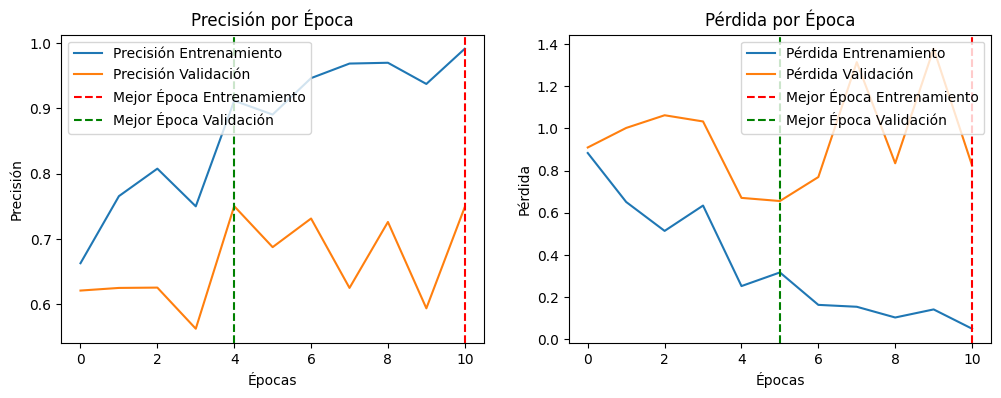

In [20]:
# Calcular la mejor época de entrenamiento y validación en base a la precisión
mejor_epoca_precision_entrenamiento = history.history['accuracy'].index(max(history.history['accuracy'])) + 1
mejor_epoca_precision_validacion = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Calcular la mejor época de entrenamiento y validación en base a la pérdida
mejor_epoca_perdida_entrenamiento = history.history['loss'].index(min(history.history['loss'])) + 1
mejor_epoca_perdida_validacion = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

# Mostrar los resultados
print('Mejor época de entrenamiento en base a la precisión: ', mejor_epoca_precision_entrenamiento-1)
print('Precisión: ', history.history['accuracy'][mejor_epoca_precision_entrenamiento-1])
print('Mejor época de validación en base a la precisión: ', mejor_epoca_precision_validacion-1)
print('Precisión: ', history.history['val_accuracy'][mejor_epoca_precision_validacion-1])
print('Mejor época de entrenamiento en base a la pérdida: ', mejor_epoca_perdida_entrenamiento-1)
print('Pérdida: ', history.history['loss'][mejor_epoca_perdida_entrenamiento-1])
print('Mejor época de validación en base a la pérdida: ', mejor_epoca_perdida_validacion-1)
print('Pérdida: ', history.history['val_loss'][mejor_epoca_perdida_validacion-1])

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.axvline(x=mejor_epoca_precision_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_precision_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Precisión por Época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.axvline(x=mejor_epoca_perdida_entrenamiento-1, color='r', linestyle='--', label='Mejor Época Entrenamiento')
plt.axvline(x=mejor_epoca_perdida_validacion-1, color='g', linestyle='--', label='Mejor Época Validación')
plt.title('Pérdida por Época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [25]:
# Detalles del modelo entrenado
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,145,286 (4.37 MB)

 Trainable params: 1,144,836 (4.37 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [26]:
# Detalle de precisión y pérdida del modelo
precision_entrenamiento = model.evaluate(data_entrenamiento)
precision_validacion = model.evaluate(data_validacion)

print('Precisión en entrenamiento: ', precision_entrenamiento[1])
print('Pérdida en entrenamiento: ', precision_entrenamiento[0])

print('Precisión en validación: ', precision_validacion[1])
print('Pérdida en validación: ', precision_validacion[0])

563/563 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9459 - loss: 0.1716
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7583 - loss: 0.6740
Precisión en entrenamiento:  0.9462222456932068
Pérdida en entrenamiento:  0.16978344321250916
Precisión en validación:  0.7507500052452087
Pérdida en validación:  0.6702544689178467


In [27]:
# Imprimir los pesos del modelo entrenado
pesos = model.get_weights()
print('Pesos: ', pesos)

Pesos:  [array([[[[-7.65143707e-02, -6.08511306e-02,  1.09988181e-02,
           1.12808824e-01, -6.73875511e-02,  4.93188500e-02,
          -3.59806535e-03,  1.05688944e-02, -8.80414993e-02,
          -2.55228672e-02, -3.56430598e-02,  5.39880618e-02,
           1.37785450e-01, -6.92645311e-02,  4.66885790e-03,
           7.77307004e-02, -1.53149543e-02,  1.43849015e-01,
          -4.33736220e-02,  9.95897353e-02,  9.61513519e-02,
          -1.36236712e-01,  2.21991222e-02,  1.11145772e-01,
          -2.67904215e-02,  8.85237008e-02,  2.80199144e-02,
           7.09048361e-02, -5.84678445e-03,  3.58138308e-02,
          -4.26337868e-03, -1.18320212e-01],
         [-9.81644690e-02, -8.44836906e-02,  7.72303492e-02,
           1.05757512e-01, -4.48085144e-02,  2.96629500e-02,
          -8.20938349e-02, -3.15837041e-02, -1.36850759e-01,
          -1.67860463e-01, -1.69940308e-01,  3.18281166e-02,
           2.68005617e-02,  1.40265259e-03, -4.20264713e-02,
          -9.53344256e-02,  2.1

### Resultado
El modelo alcanzó una precisión de 94,6% y una pérdida de 16.9% en la fase de entrenamiento, y una precisión de 75% y una pérdida 67% en la fase de validación, lo que aún representa una alta pérdida en la validación. A pesar de ello, se procede a guardar los resultados del modelo para realización de pruebas. Esto se puede deber a un sobreajuste o a que los hiperparámetros no están ajustados correctamente, así que en los próximos modelos se buscará revisar estos puntos.

In [21]:
# Guardado del modelo
model.save(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo4.h5')

# Guardado del modelo en el formato nativo de Keras
model.save(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo4.keras')

In [24]:
# Guardado del modelo en el formato de TensorFlow a partir del modelo de Keras ya guardado
model = tf.keras.models.load_model(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo4.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo convertido
with open(r'C:\Users\carolina\Documents\Proyectos_programacion\SIRA\backend\models\sira_modelo4.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmpgffli0qf\assets


INFO:tensorflow:Assets written to: C:\Users\carolina\AppData\Local\Temp\tmpgffli0qf\assets


Saved artifact at 'C:\Users\carolina\AppData\Local\Temp\tmpgffli0qf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2135138173008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688786064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688783376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688783568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688783952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688791248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688789328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688788560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134688790480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2134611451472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  213